# Exploratory Data Analysis 

## Importing required libraries

In [33]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import math 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading data

In [34]:
df=pd.read_excel("hist_data.xlsx")
df


,Product,Cost,Year,Monthly_Sales
0,BEER,42,2019-08-10,208
1,INSTANT SOUPS,161,2021-07-20,890
2,LIQUOR,135,2018-02-08,223
3,SPICES,77,2021-08-31,950
4,SHAMPOO,148,2020-06-10,1300
...,...,...,...,...
199995,TOMATOES,153,2019-01-29,980
199996,HONEY,201,2021-02-07,104
199997,PEANUT BUTTER,62,2019-12-17,88
199998,COOKIES,45,2020-07-10,148


In [35]:
df.info()
print(df['Year'].min())
print(df['Year'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Product        200000 non-null  object        
 1   Cost           200000 non-null  int64         
 2   Year           200000 non-null  datetime64[ns]
 3   Monthly_Sales  200000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.1+ MB
2018-01-01 00:00:00
2021-12-31 00:00:00


In [36]:
df['Product'].unique()

array(['BEER', 'INSTANT SOUPS', 'LIQUOR', 'SPICES', 'SHAMPOO',
       'MOUTHWASH', 'SPRITE', 'SNICKERS', ' PEANUT BUTTER', 'BREAD',
       'MUFFINS', 'HAND SANITIZERS', 'CONDITIONER', 'PASTA & MACARONI',
       'BUTTER', 'CRACKERS', 'POTATOES', 'APPLES', 'FRUIT JUICE',
       'PEPPERONI', 'SHOWER GEL', 'MILKSHAKE', ' DISH SOAP', 'WINE',
       'FLOWERS', 'CEREAL GRAINS', 'DELI CHEESE', 'SOAP', 'DORITOS',
       'CUPCAKES', 'HAM', 'KIT KAT', 'FROZEN FISH', ' DOG CAT FOOD',
       'BAKING POWDER', 'ICE CREAM', 'SODA', ' SHAVING RAZORS',
       'MOISTURIZER', 'OLIVE OIL', ' DETERGENTS FABRIC SOFTENERS',
       ' BREAKFAST CEREAL', 'SUNFLOWER OIL', 'VINEGAR', 'CHITOS',
       'INSTANT OATMEAL', 'DENTAL FLOSS', 'COKE', 'NOODLES', 'EGGS',
       'FRIED CHICKEN', 'BACON', 'TOOTHPASTE', ' DISPOSABLE CUPS', 'SALT',
       'SEASONINGS', 'APPLESAUCE ', 'TOILET PAPER', 'TOMATOES',
       'BOTTLED WATER', 'DEODORANTS', 'BLOCK CHEESE',
       'FEMININE HYGIENE PRODUCTS', 'SAUSAGES', 'TONER', 'LEMONS

In [37]:
# number of units sold per product
result = df.groupby('Product')['Monthly_Sales'].sum()
result

Product
 BREAKFAST CEREAL               1698705
 DETERGENTS FABRIC SOFTENERS    1733068
 DISH SOAP                      1658114
 DISPOSABLE CUPS                1665130
 DOG CAT FOOD                   1667137
                                 ...   
TOOTHBRUSH                      1655164
TOOTHPASTE                      1647376
VINEGAR                         1680584
WINE                            1719500
YOGURT                          1660499
Name: Monthly_Sales, Length: 87, dtype: int64

## Finding top 3 selling products


In [38]:

print(df['Product'].value_counts())     # for all products

print(df['Product'][df['Product'] == 'BEER'].value_counts())      # for single product



Product
TOILET PAPER       2411
CHITOS             2392
 PEANUT BUTTER     2391
INSTANT OATMEAL    2373
LEGUMES            2371
                   ... 
MAPLE SYRUP        2206
SOAP               2203
FRIED CHICKEN      2198
CONDITIONER        2163
FLOUR              2142
Name: count, Length: 87, dtype: int64
Product
BEER    2237
Name: count, dtype: int64


In [39]:
top_3 = df['Product'].value_counts().head(3)    # top 3 selling products
top_3

Product
TOILET PAPER      2411
CHITOS            2392
 PEANUT BUTTER    2391
Name: count, dtype: int64

In [40]:
bot_2 = df['Product'].value_counts().tail(2)    # bottom 2 selling products
bot_2


Product
CONDITIONER    2163
FLOUR          2142
Name: count, dtype: int64

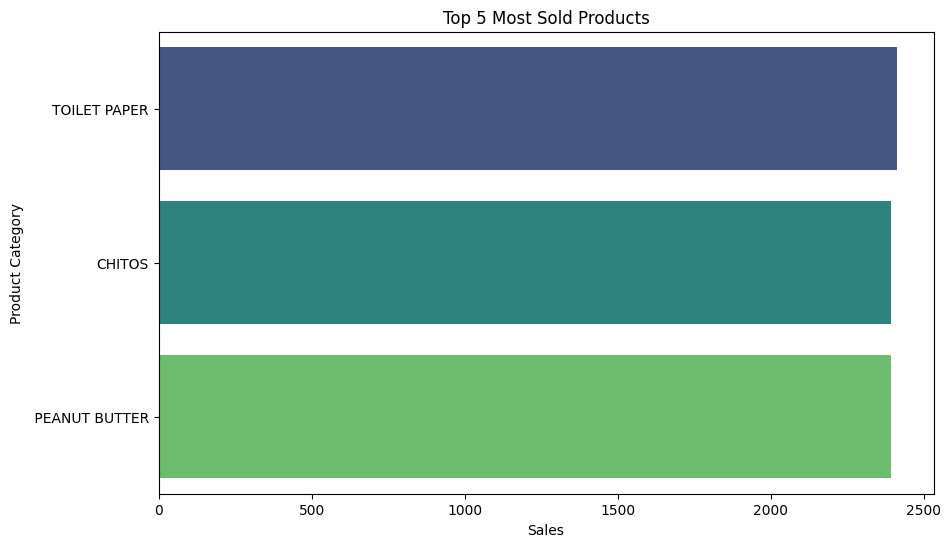

In [41]:
#plotting bar graph of top 3 products
plt.figure(figsize=(10, 6)) 
sns.barplot(x=top_3.values, y=top_3.index, hue=top_3.index, palette='viridis')
plt.title('Top 5 Most Sold Products')
plt.xlabel('Sales')
plt.ylabel('Product Category')
plt.show()

           Year  Monthly_Sales
0    2018-01-01         108451
1    2018-01-02          92058
2    2018-01-03         119886
3    2018-01-04          94862
4    2018-01-05         120212
...         ...            ...
1456 2021-12-27          98386
1457 2021-12-28         112026
1458 2021-12-29          83883
1459 2021-12-30         105209
1460 2021-12-31         108199

[1461 rows x 2 columns]


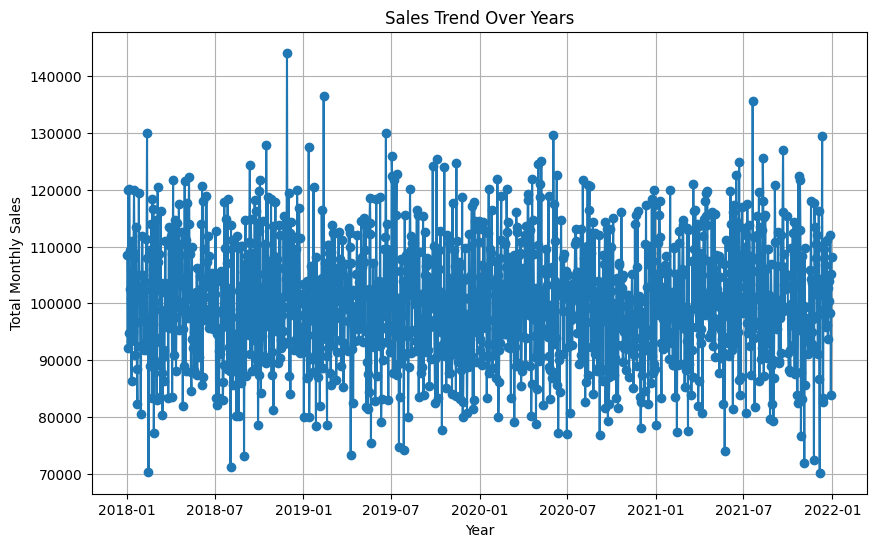

In [42]:
#plotting sum of monthly sales wrt year

sales_trend = pd.DataFrame(df.groupby('Year').sum()['Monthly_Sales'].reset_index())
print(sales_trend)

# Plotting the sales trend as a line plot
plt.figure(figsize=(10, 6))
plt.plot(sales_trend['Year'], sales_trend['Monthly_Sales'], marker='o')
plt.title('Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Monthly Sales')
plt.grid(True)
plt.show()
